# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [78]:
# Importing the packages required for the project
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# Import Downloaded Data
df_twitter_archieve = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [80]:
#Download file using URL and Request Libraries
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)
# Save file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
# Reading the TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

<Response [200]>


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [81]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Saving the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [82]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})

tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Twitter Archieve Table

In [83]:
df_twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [84]:
df_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [85]:
df_twitter_archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [86]:
df_twitter_archieve.duplicated().sum()

0

In [87]:
df_twitter_archieve.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [88]:
df_twitter_archieve.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [89]:
df_twitter_archieve.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [90]:
df_twitter_archieve.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [91]:
df_twitter_archieve.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

## Image Prediction Table

In [92]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [93]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [95]:
image_prediction.tweet_id.duplicated().sum()

0

In [96]:
image_prediction.jpg_url.duplicated().sum()

66

In [97]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
Shih-Tzu                     17 
Lakeland_terrier             17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

In [98]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Pembroke                          27 
collie                            27 
Eskimo_dog                        27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
malinois                          20 
toy_terrier                       20 
Samoyed                           20 
miniature_pinscher                20 
chow                              20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [99]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

### Tweet json Table

In [100]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [101]:
tweet_json.info

<bound method DataFrame.info of                 tweet_id  retweet_count  favorite_count
0     892420643555336193  8853           39467         
1     892177421306343426  6514           33819         
2     891815181378084864  4328           25461         
3     891689557279858688  8964           42908         
4     891327558926688256  9774           41048         
5     891087950875897856  3261           20562         
6     890971913173991426  2158           12041         
7     890729181411237888  16716          56848         
8     890609185150312448  4429           28226         
9     890240255349198849  7711           32467         
10    890006608113172480  7624           31166         
11    889880896479866881  5156           28268         
12    889665388333682689  8538           38818         
13    889638837579907072  4735           27672         
14    889531135344209921  2321           15359         
15    889278841981685760  5637           25652         
16    8889172381

In [102]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [103]:
tweet_json.duplicated().sum()

0

### Quality issues

#### Twitter Archieve Table:


1. The Twitter Archive table should exclusively include original ratings with photos. Entries related to retweets and responses, along with their respective columns, should be eliminated. The following columns, namely "in_reply_to_status_id," "in_reply_to_user_id," "retweeted_status_id," and "retweeted_status_user_id," should all have a string data type. Additionally, the picture component will be addressed later.

2. In the df_twitter_archive table, the columns related to retweets and replies should be removed. Any data type issues associated with these columns will be resolved once they are dropped.

3. Anomalies in the rating denominator should be addressed by removing the "+0000" from the timestamp. For instance, numbers such as 170, 150, 130, etc., need to be rectified. Furthermore, the timestamp column should be converted from string to datetime format. There are ten illogical values in the rating numerator, such as 1776, 960, 666, 204, 165, etc., which should be handled appropriately.

4. All canine stages, including doggo, floofer, pupper, and puppo, should be consolidated into a single column. Anomalies in the rating denominator, such as 170, 150, 130, etc., which deviate from the usual denominator value of 10, need to be addressed. Similarly, illogical rating numerators, such as 1776, 960, 666, 204, 165, etc., should be handled. The current format of the source data is redundant and challenging to interpret.

#### Image Prediction Table:

5. The data sources in the Image Prediction table are redundant and difficult to interpret. The columns "p1," "p2," and "p3" containing predicted images exhibit erroneous capitalization and have duplicate URLs with ".jpg" extension.

6. There are numerous entries in the table that do not represent dogs, such as a jaguar, harp, peacock, parachute, etc. These non-dog entries need to be addressed.

7. For the purpose of this investigation, only the most certain dog breed predictions are required.

#### Tweet json Table:

8. The Twitter Archive table has missing data, possibly due to retweets.


### Tidiness issues
1. In the Twitter Archive table, the organization of dog stages (doggo, floofer, pupper, and puppo) lacks consistency. These dog stage names should be consolidated into a single column to adhere to data cleanliness standards.

2. As per the standards for clean data, the three tables (Twitter Archive, Image Prediction, and Tweet JSON) should be merged into a single table. Since they all pertain to the same kind of observational unit, combining them will enhance data tidiness and facilitate analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [185]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archieve.copy()
df_image_prediction_clean = image_prediction.copy()
df_tweet_json_clean = tweet_json.copy()

### Issue #1: df_twitter_archieve: Exclusively include original ratings while excluding retweets and replies.

#### Define: Only keep rows where the retweeted status id field contains NaN by using the isnull() filter. The same procedure is used for in reply to status id.

#### Code

In [186]:
# Eliminate retweets
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

# Eliminate replies
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [187]:
df_twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2: df_twitter_archieve: Remove the retweets and replies-related columns.

#### Define: Retweeted status id, Retweeted status user id, and Retweeted status timestamp columns can all be deleted with df.drop.

#### Code

In [188]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test

In [189]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: df_twitter_archieve: Change timestamp datatype to datetime and delete +0000

#### Define: Convert a timestamp from str to datetime, remove +0000 and use pd.to datetime

#### Code

In [190]:
# Remove +0000
df_twitter_archive_clean['timestamp'] = df_twitter_archive_clean['timestamp'].str.replace('\+0000$', '', regex=True)

# Convert to datetime
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [191]:
df_twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #4: Image Prediction Table: Delete any dog-unrelated entries. The same with tweet json and twitter archive. 

#### Define: Use isin function to filter and remove rows from all three dataframes that have p1 dog, p2 dog, and p3 dog columns that are False.

#### Code

In [192]:
# Rows in the data before cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 3)


In [193]:
#Put tweet ids from postings that are not about dogs into a drop list after filtering them.
drop_list = df_image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
df_image_prediction_clean = df_image_prediction_clean[~df_image_prediction_clean.tweet_id.isin(drop_list)]
df_twitter_archive_clean = df_twitter_archive_clean[~df_twitter_archive_clean.tweet_id.isin(drop_list)]
df_tweet_json_clean = df_tweet_json_clean[~df_tweet_json_clean.tweet_id.isin(drop_list)]

#### Test

In [194]:
# Number of rows remaining after data cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


### Issue #6: Twitter Archieve Table: incorrect values in the rating denominator. The project overview states that the ratings typically have a denominator of 10. 

#### Define: The columns tweet id, text, rating numerator, and rating denominator should be added to a new dataframe. To correct these ratings, filter for rating denominator not equal to 10 and then read the text.

#### Code

In [195]:
# Creating new dataframe with selected columns
df_abnor_rating = df_twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnor_denominator = df_abnor_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnor_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [196]:
# Correction of ratings by reading through the text, most of the abnormal ratings are associated with Several dogs.
# tweet_id: 820690176645140481 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  rating missing
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 666287406224695296
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 ---> Several Dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 ---> several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10

#### Test

In [197]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    1792
Name: rating_denominator, dtype: int64

### Issue #7: Twitter Archieve Table: Irregular values in the rating numerator. After deleting the ratings that weren't for dogs, several anomalous rating levels disappeared.

#### Define: 
To identify unusual values, use value counts; to fix the ratings, verify the text.

To eliminate entires that are not dogs, use isin and ~.

#### Code

In [198]:
df_twitter_archive_clean.rating_numerator.value_counts()

12    464
10    380
11    379
13    256
9     136
8     71 
7     31 
14    27 
6     16 
5     15 
4     6  
3     5  
2     2  
75    1  
27    1  
26    1  
0     1  
Name: rating_numerator, dtype: int64

In [199]:
df_abnor_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [200]:
# Correcting the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11

#### Test

In [201]:
df_twitter_archive_clean.rating_numerator.value_counts()

12.00    464
10.00    380
11.00    380
13.00    256
9.00     136
8.00     71 
7.00     31 
14.00    27 
6.00     16 
5.00     15 
4.00     6  
3.00     5  
2.00     2  
11.27    1  
11.26    1  
9.75     1  
Name: rating_numerator, dtype: int64

### Issue #8: Image Prediction Table: We simply need to use the image forecast. 

#### Define: Use replace to substitute short category names for the url.

- Add two new columns for breed and confidence level.
- Create a function to sort through the predictions and identify the one that is most certain to be a breed of dog. The most certain prediction is p1, which is followed by p2 and p3.
- Removing any unnecessary columns.

#### Code

In [204]:
# Create a dog_breed column and a confidence_level column
dog_breed = []
confidence_level = []

# Create a function to find the most confidence prediction that is a dog_breed
# p1 is the most confidence prediction, followed by p2 and p3
def image_pred(row):
    if row['p1_dog']:
        dog_breed.append(row['p1'])
        confidence_level.append(row['p1_conf'])
    elif row['p2_dog']:
        dog_breed.append(row['p2'])
        confidence_level.append(row['p2_conf'])
    elif row['p3_dog']:
        dog_breed.append(row['p3'])
        confidence_level.append(row['p3_conf'])
    else:
        dog_breed.append('Unknown_dog_breed')
        confidence_level.append(0)
        
# Apply the function by column        
df_image_prediction_clean.apply(image_pred, axis=1)

# Add the dog_breed and confidence_level column to df_image_prediction_clean 
df_image_prediction_clean['dog_breed'] = dog_breed
df_image_prediction_clean['confidence_level'] = confidence_level

# Drop columns no longer needed
df_image_prediction_clean = df_image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [205]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #9: Image Prediction Table:Irregular capitalization in the p1 column

#### Define: To capitalize the first letter, use str.capitalize function fronm the pandas library.

#### Code

In [123]:
df_image_prediction_clean.dog_breed = df_image_prediction_clean.dog_breed.str.capitalize()

#### Test

In [124]:
df_image_prediction_clean.head(5)

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


### Issue #10: df_twitter_archive data: All canine stages, including doggo, floofer, pupper, and puppo, should be in a single column.

#### Define: The doggo, floofer, pupper, and puppo columns can be melted into a type and dog stage column using pd.melt. Remove the middle column.

#### Code

In [125]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_phase column
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_phase')

# Drop type column  
df_twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_phase and drop duplicates
df_twitter_archive_clean = df_twitter_archive_clean.sort_values('dog_phase').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [126]:
df_twitter_archive_clean.dog_phase.value_counts()

None       1502
pupper     194 
doggo      63  
puppo      23  
floofer    10  
Name: dog_phase, dtype: int64

### Issue #11: df_twitter_archive data:The twitter archive table should contain the tweet json file.

#### Define: Join the retweet count and favorite count columns to the tweet id field in the twitter archive database.

#### Code

In [127]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

#### Test

In [128]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count
0,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10,Reese,None,66,203
1,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273
2,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559
3,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565
4,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563


### Issue #12: The twitter archive table needs to include image prediction. Rows with images should only be retained because we only want original ratings that include them.

#### Define: Use replace to substitute short category names for the url.

- Using the tweet id as a joining factor, use merge to combine the image prediction table and the twitter archive table.
- Only nonnull rows should be retained after using the notnull filter.

#### Code

In [129]:
# Joining tables using left join
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
df_twitter_archive_clean.jpg_url.isnull().sum()

126

In [130]:
df_twitter_archive_clean = (df_twitter_archive_clean[df_twitter_archive_clean.jpg_url.notnull()])

#### Test

In [131]:
# number of null values after cleaning
df_twitter_archive_clean.jpg_url.isnull().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [132]:
# Viewing the data
df_twitter_archive_clean.head()  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count,jpg_url,dog_breed,confidence_level
0,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10,Reese,None,66,203,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
1,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
2,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
3,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
4,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709


In [133]:
df_twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1791
Data columns (total 14 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1666 non-null object
dog_phase             1666 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
dog_breed             1666 non-null object
confidence_level      1666 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 195.2+ KB


In [134]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
df_twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The quantity of unique tweets

2.Total number of retweets

3.Total number of favorites

### Visualization

In [135]:
df.dog_breed.value_counts()

Golden_retriever                  156
Labrador_retriever                106
Pembroke                          94 
Chihuahua                         90 
Pug                               62 
Toy_poodle                        50 
Chow                              48 
Samoyed                           42 
Pomeranian                        41 
Malamute                          33 
Chesapeake_bay_retriever          31 
French_bulldog                    31 
Cocker_spaniel                    30 
Miniature_pinscher                24 
Eskimo_dog                        22 
German_shepherd                   21 
Cardigan                          21 
Shih-tzu                          20 
Siberian_husky                    20 
Staffordshire_bullterrier         20 
Beagle                            20 
Maltese_dog                       19 
Rottweiler                        18 
Shetland_sheepdog                 18 
Italian_greyhound                 17 
Basset                            17 
Lakeland_ter

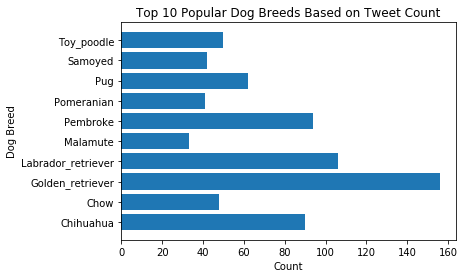

In [213]:
# Create a bar graph showing the top 10 dog breeds based on the number of posts.
dog_breed_counts = df.dog_breed.value_counts().sort_values(ascending=True).tail(10)

plt.barh(dog_breed_counts.index, dog_breed_counts.values)
plt.title('Top 10 Popular Dog Breeds Based on Tweet Count')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

plt.show()

### Insights from the above Graph:


To ensure that only tweets about dogs are considered, we performed data sanitization on the image prediction data. The analysis reveals that the Golden Retriever is the most popular dog breed, with 156 tweets dedicated to it. The Labrador Retriever ranks second with 106 tweets. Following closely are the Pembroke breed with 94 tweets, Chihuahua with 88 tweets, and Pug with 62 tweets. The popularity of other breeds gradually decreases in subsequent positions.

Next, we will utilize data from favorites and retweets to create a plot showcasing the most popular dog breeds.

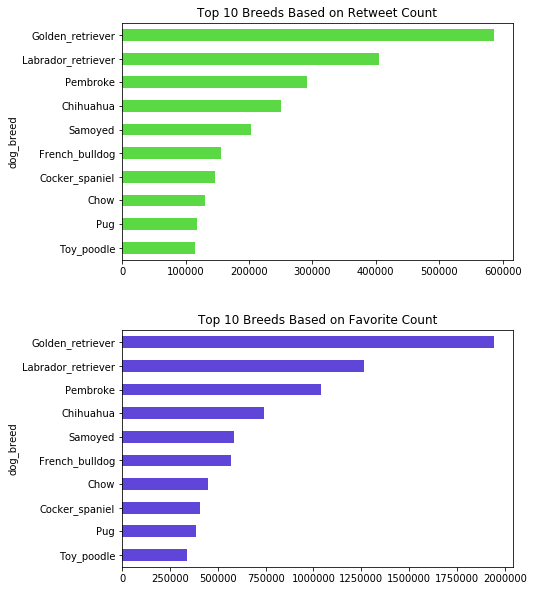

In [206]:
# Data to plot
columns = ['dog_breed', 'retweet_count', 'favorite_count']
df_dog_breed = df[columns]

# Calculate sum of retweet count and favorite count for each dog breed
dog_breed_retweet = df_dog_breed.groupby('dog_breed')['retweet_count'].sum().nlargest(10).sort_values()
dog_breed_favorite = df_dog_breed.groupby('dog_breed')['favorite_count'].sum().nlargest(10).sort_values()

# Plot horizontal bar chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

# Top 10 breeds based on number of retweets
dog_breed_retweet.plot.barh(ax=ax1, color='#5BD945')
ax1.set_title("Top 10 Breeds Based on Retweet Count")

# Top 10 breeds based on number of favorites
dog_breed_favorite.plot.barh(ax=ax2, color='#6045D9')
ax2.set_title("Top 10 Breeds Based on Favorite Count")

fig.subplots_adjust(hspace=0.3)

### Insights From the above Bar graphs:


- Based on the number of tweets, the top 10 most popular dog breeds are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Samoyed, Pomeranian, Malamute, and Chesapeake Bay Retriever.

- When considering the number of retweets, the top 10 breeds are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Samoyed, French Bulldog, Cocker Spaniel, Chow, Pug, Toy Poodle, and Pomeranian.

- The top 10 breeds based on favorite count are very similar to the rankings based on retweet count, with slight variations. The exceptions are the 5th-ranked French Bulldog, 6th-ranked Chow, 7th-ranked Cocker Spaniel, and 10th-ranked Malamute.

These findings suggest that there is a correlation between favorites and retweets, as people who retweet are more likely to also click the favorite button. The consistent pattern across all three graphs reinforces the popularity of Golden Retrievers, Labrador Retrievers, Pembroke, and Chihuahuas as the top four dog breeds.

### What is the most common Dog Phase?

In [208]:
df.dog_phase.value_counts(normalize=True)

None       0.845738
pupper     0.103842
doggo      0.032413
puppo      0.013205
floofer    0.004802
Name: dog_phase, dtype: float64

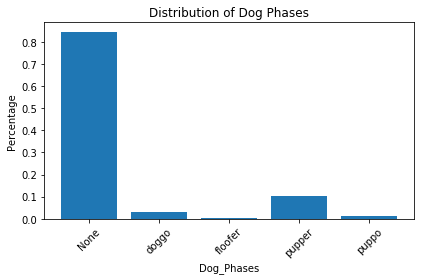

In [216]:
# Plot bar chart
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = df.dog_phase.value_counts(normalize=True)

plt.bar(labels, values)
plt.xlabel('Dog_Phases')
plt.ylabel('Percentage')
plt.title('Distribution of Dog Phases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from Bar Chart

According to the Bar chart, more than 80% of tweets do not include information about the dog phase in the article. Pupper is the most frequent phase among all those tweets for individuals who have the phase information.

### Rating the numerator

We'll concentrate on rating numerator here because the denominator of a rating is almost always 10, and because the dataset has been cleaned.

In [140]:
df.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     14 
4.00     6  
3.00     5  
2.00     2  
11.27    1  
11.26    1  
9.75     1  
Name: rating_numerator, dtype: int64

In [141]:
df.rating_numerator.describe()

count    1666.000000
mean     10.828499  
std      1.757643   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

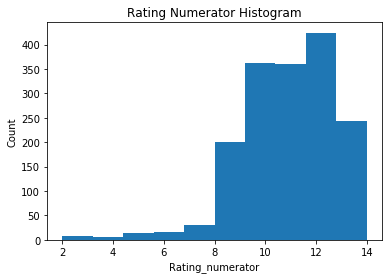

In [142]:
plt.hist(df.rating_numerator)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating_numerator')
plt.ylabel('Count');

We can see that, the most popular ratings are 12 with over 400 tweets, followed by 10.00, 11.00, 13, and 9.00. The rating is 10.83 on average.

### Based on the number of tweets, popular dog breeds receive average ratings

In [143]:
# Make a list of top popular dog breeds based on number of tweets
top_tweet_count = df.dog_breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
dog_breed_list = top_tweet_count.dog_breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('dog_breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('dog_breed').reset_index(name='avg_rating')
dog_breed_avg_rating = avg_rating[avg_rating['dog_breed'].isin(dog_breed_list)]

dog_breed_avg_rating

,dog_breed,avg_rating
9,Samoyed,11.690476
10,Golden_retriever,11.557692
14,Pembroke,11.425532
15,Chow,11.416667
27,Labrador_retriever,11.198113
39,Toy_poodle,11.000000
44,Pomeranian,10.945122
48,Malamute,10.878788
61,Chihuahua,10.533333
77,Pug,10.241935


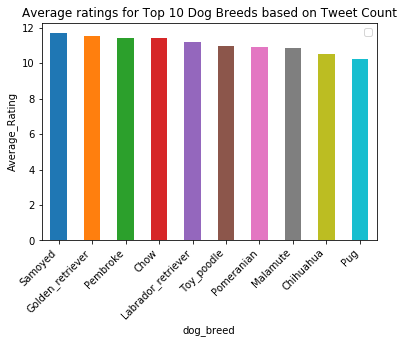

In [215]:
# Plot chart
dog_breed_avg_rating.plot(kind='bar', x='dog_breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average_Rating")
plt.xlabel("dog_breed")
plt.xticks(rotation=45, ha = 'right')
plt.legend([]);


It is clear that popular dogs are rated similarly to another.